#  Model the prices of cars

Machine Learning
Problem
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their
manufacturing unit there and producing cars locally to give competition to their US and
European counterparts.
They have contracted an automobile consulting company to understand the factor on which the
price of cars depends. Specifically, they want to understand the factors affecting the pricing of
cars in the American market, since those may be very different from the Chinese market. The
company wants to know:
● Which variables are significant in predicting the price of a car.
● How well those variables describe the price of a car.
Based on various market surveys, the consulting firm has gathered a large dataset of different
types of cars across the American market.
Attributes
1. Car_ID - Unique ID for each observation.
2. Symboling - Its assigned insurance risk rating, value +3 indicates that the auto is risky,
-3 that it is pretty safe.
3. carCompany - Name of company
4. fueltype - Car fuel type.
5. aspiration - Aspiration used in car
6. doornumber - Number of doors in a car
7. carbody - body of car
8. drivewheel - type of drive wheel
9. enginelocation - location of car engine
10. wheelbase - Wheelbase of car
11. carlength - length of car
12. carwidth - width of car
13. carheight - height of car
14. curbweight - The weight of a car without occupants or luggage.
15. enginetype - type of engine
16. cylindernumber - cylinder placed in the car.
17. enginesize - size of car.
18. fuelsystem - Fuel system of car.
19. boreratio - Boreratio of car
20. stroke - Stroke or volume inside the engine.
21. compressionratio - compression ratio of car.
22. horsepower - Horsepower
23. peakrpm - car peak rpm
24. citympg - Mileage in city
25. highwaympg - Mileage on highway
26. Price( Dependent Variable) - Price of car


## Objective
You are required to model the prices of cars with the available independent variables. It will be
used by management to understand how exactly the prices vary with the independent variables.
They can accordingly manipulate the design of the cars, the business strategy etc. to meet
certain price levels. Further, the model will be good for management to understand the pricing
dynamics of the new market.

 Import all the libraries and set up all the requirements that you will need

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Import the data set and check the following

- dimension of the dataset.

- data types.

- Missing value available in the dataset.

- Descriptive statistics of data and write the observation.

In [3]:
df = pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [10]:
df.describe(include='object').T

,count,unique,top,freq
CarName,205,147,toyota corona,6
fueltype,205,2,gas,185
aspiration,205,2,std,168
doornumber,205,2,four,115
carbody,205,5,sedan,96
drivewheel,205,3,fwd,120
enginelocation,205,2,front,202
enginetype,205,7,ohc,148
cylindernumber,205,7,four,159
fuelsystem,205,8,mpfi,94


### Data Cleaning



- Create the column as 'CompanyName' using 'CarName' Column. List down the unique 'CompanyName'.



In [13]:
df['CompanyName'] = df['CarName'].apply(lambda x: x.split(' ')[0])
print("\nUnique CompanyName:")
print(df['CompanyName'].unique())


Unique CompanyName:
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


- Check the correctness of data in the 'CompanyName' column.



In [14]:
print("\nCompanyName value counts:")
print(df['CompanyName'].value_counts())


CompanyName value counts:
CompanyName
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64


- Check the duplicate data in the dataset.

In [15]:
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 0


### Exploratory Data Analysis


- Visualize the 'price' column using displot and boxplot. Write down the observations.


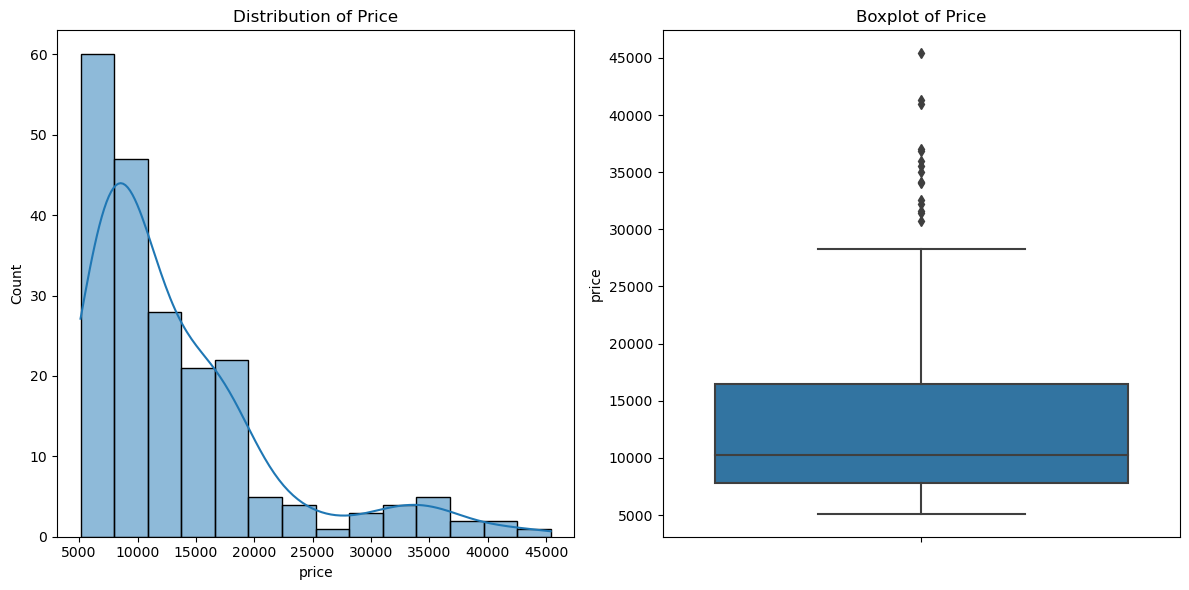

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')

plt.subplot(1, 2, 2)
sns.boxplot(y='price', data=df)
plt.title('Boxplot of Price')

plt.tight_layout()
plt.show()

- Perform the appropriate transformation to make the target as a gaussian distribution.


In [17]:
df['price'] = np.log1p(df['price'])

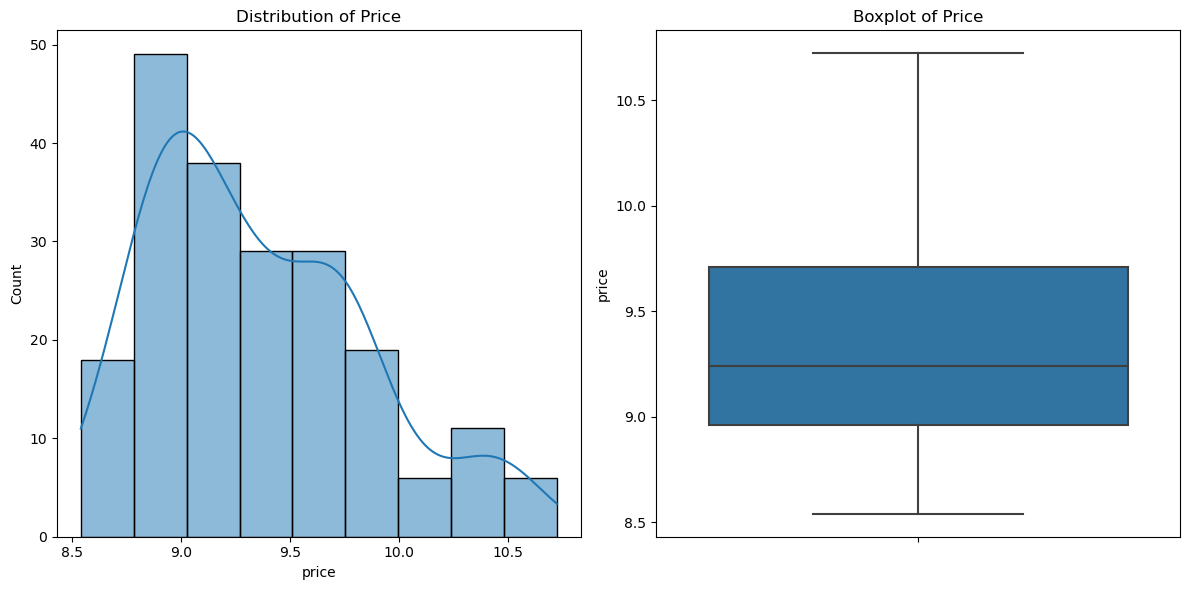

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')

plt.subplot(1, 2, 2)
sns.boxplot(y='price', data=df)
plt.title('Boxplot of Price')

plt.tight_layout()
plt.show()

- Check the linear relationship between the dependent variable "Price" and the numerical independent variables


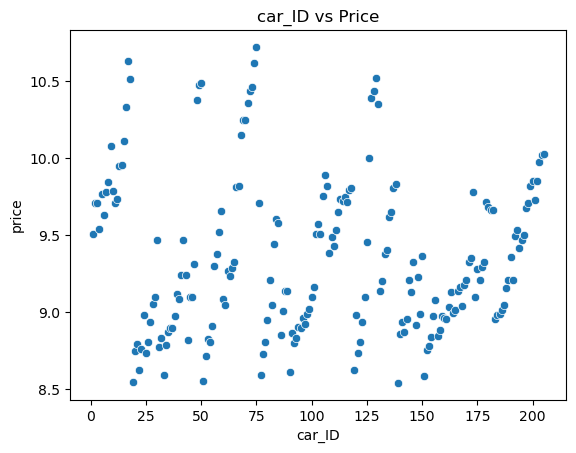

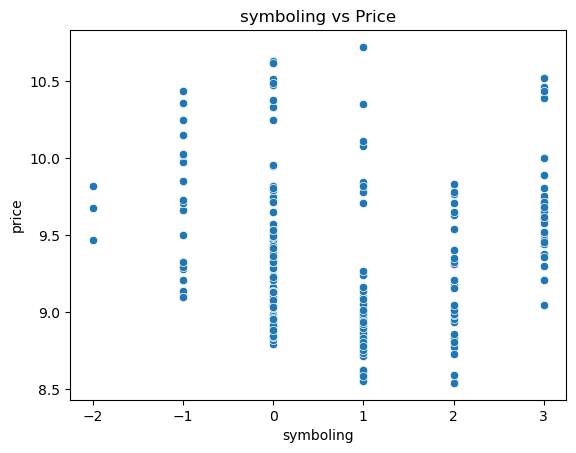

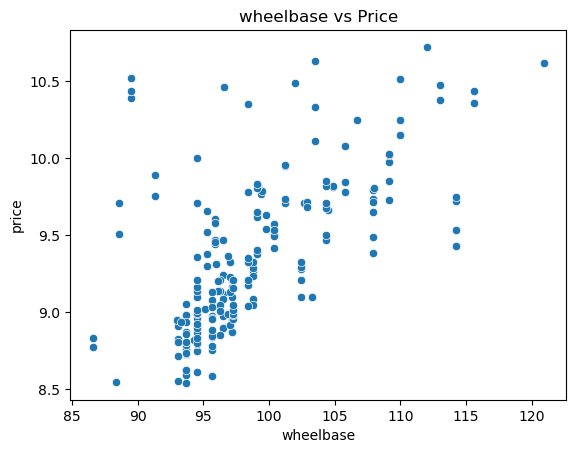

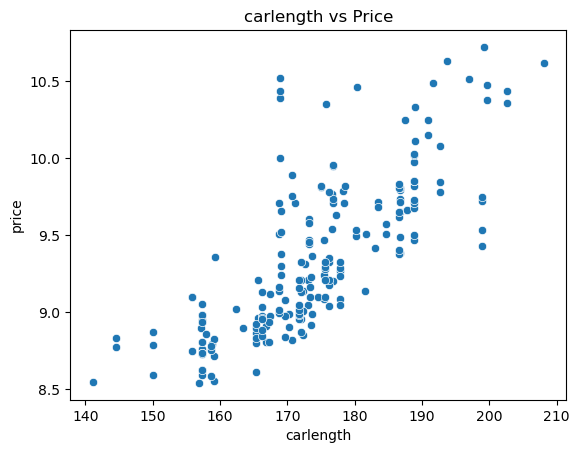

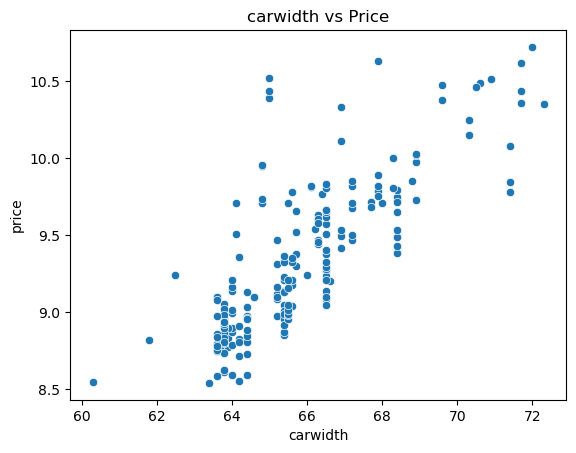

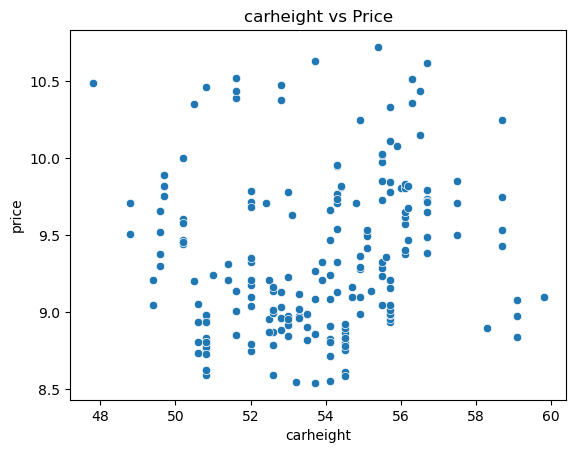

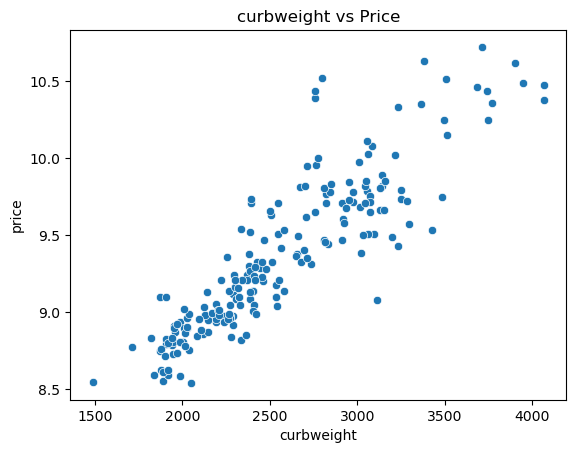

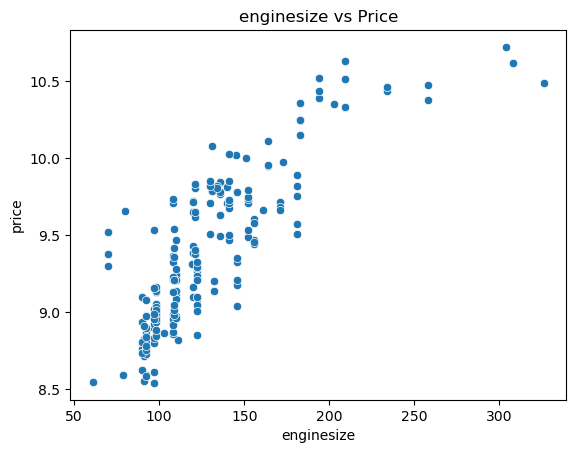

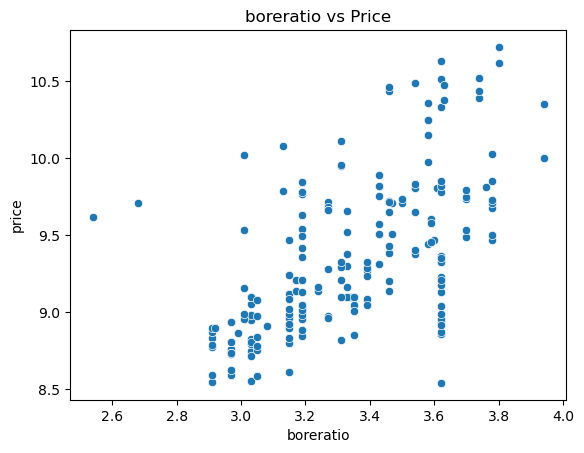

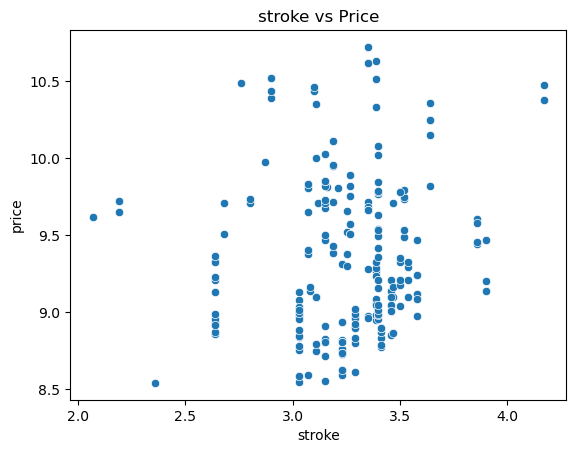

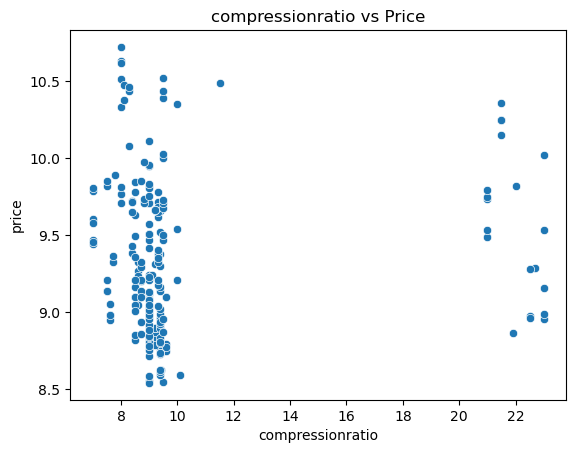

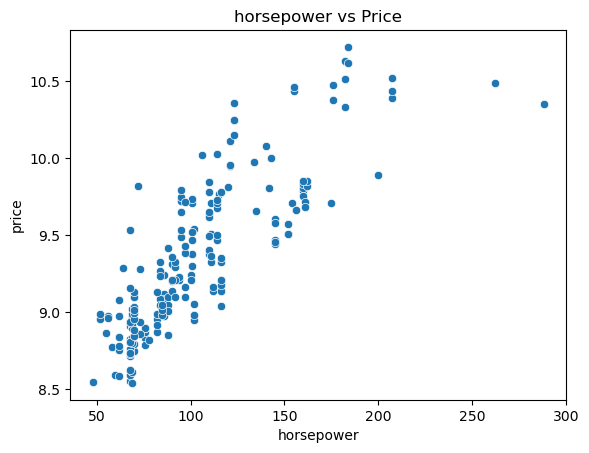

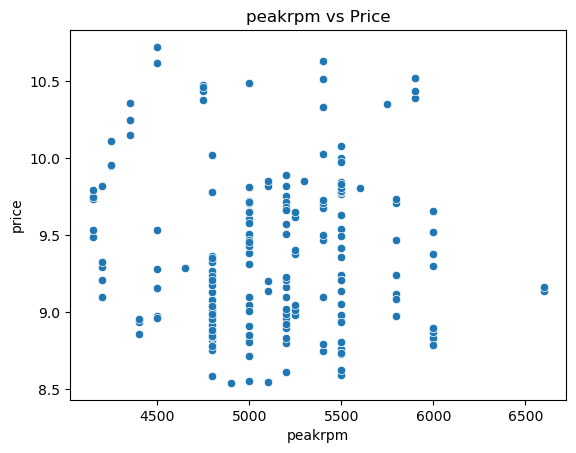

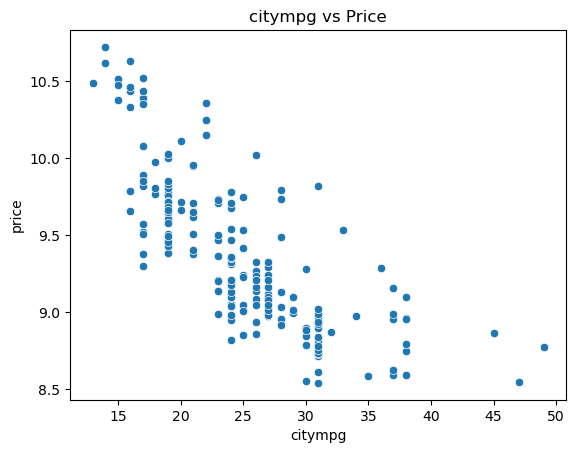

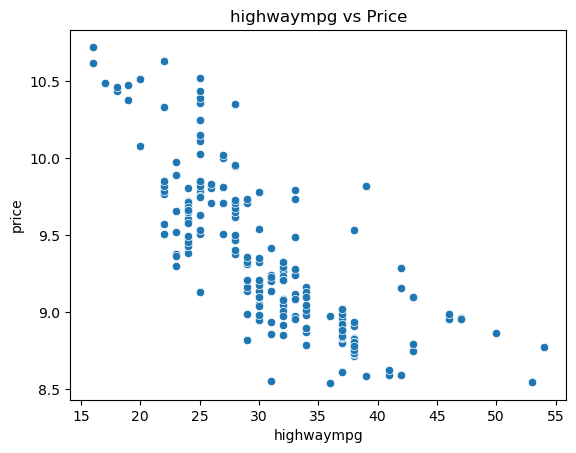

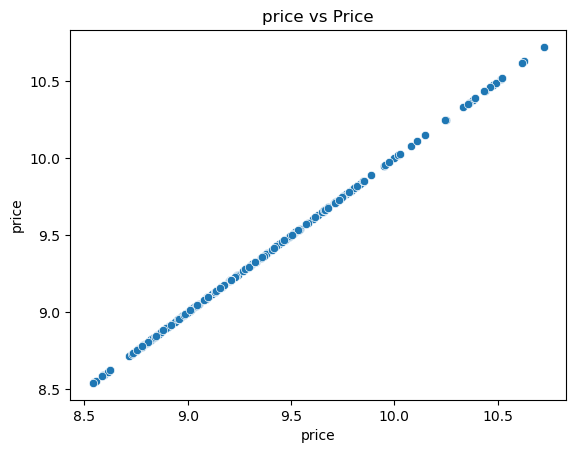

In [19]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    sns.scatterplot(x=col, y='price', data=df)
    plt.title(f'{col} vs Price')
    plt.show()

- Checking the multicollinearity between the correlated independent variables above and Price


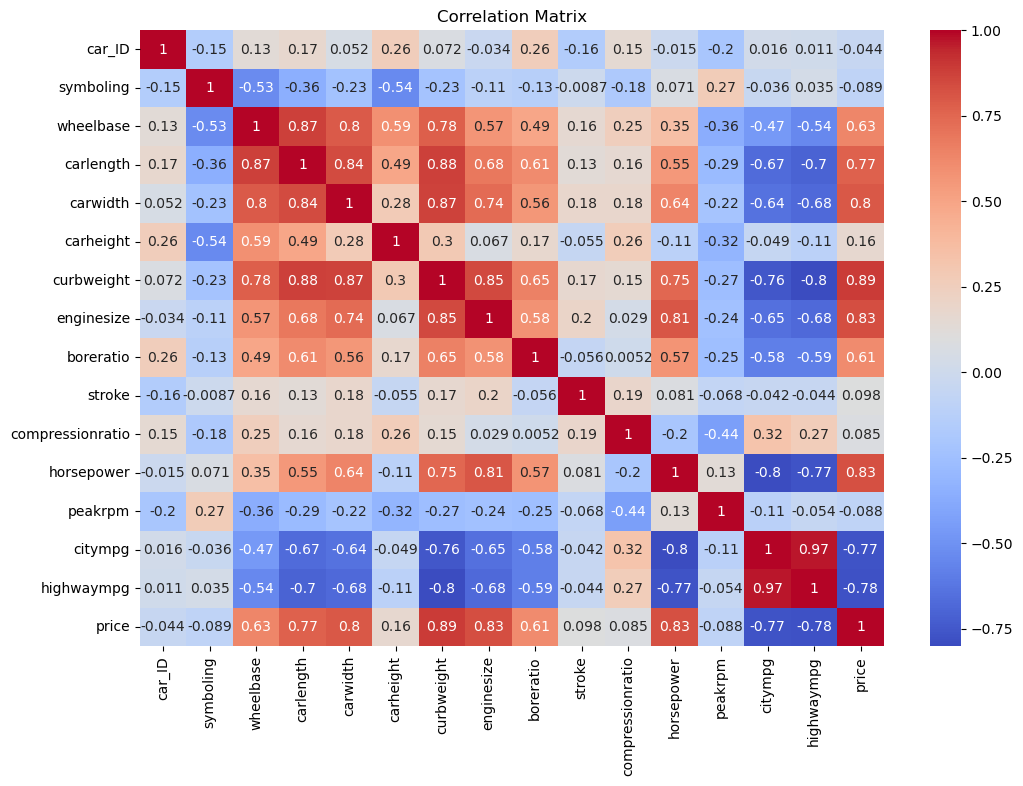

In [20]:
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- Perform Univariate, Bivariate, and Multivariate analyses to find the factors that affect the Target variables.


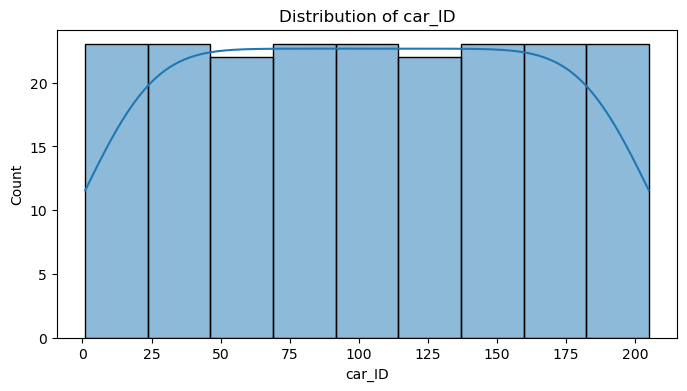

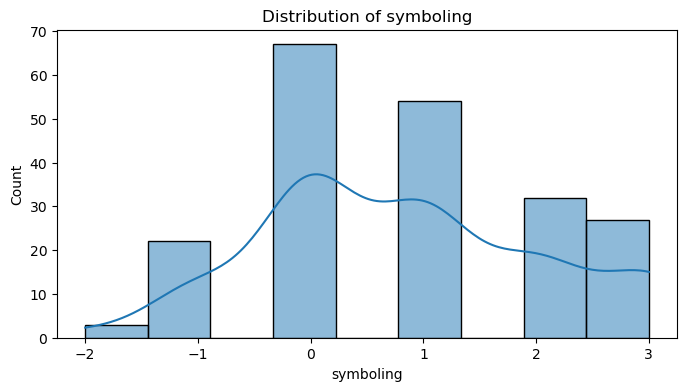

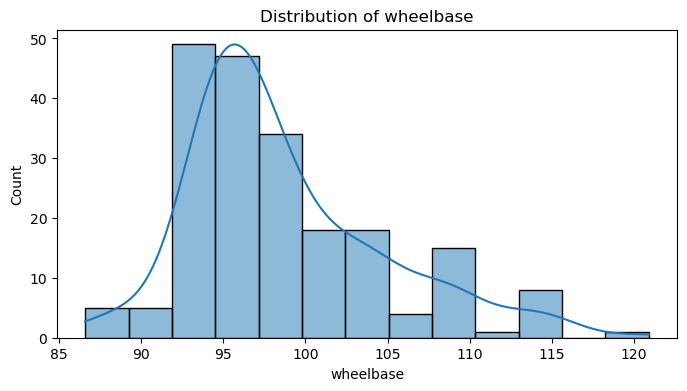

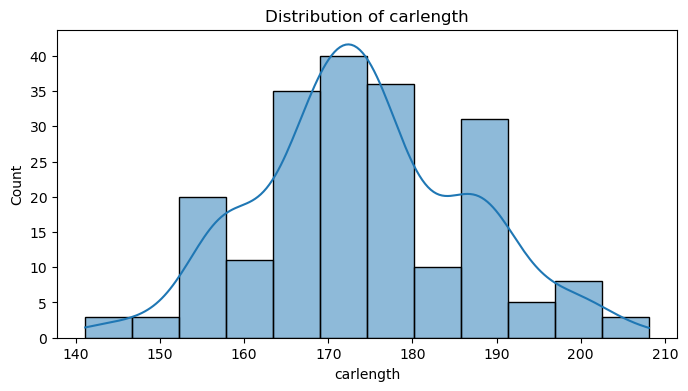

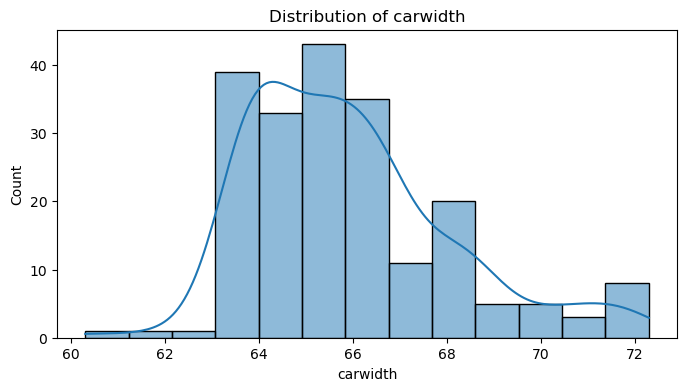

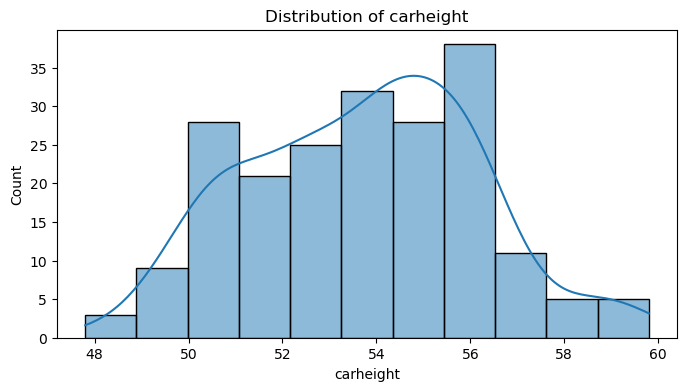

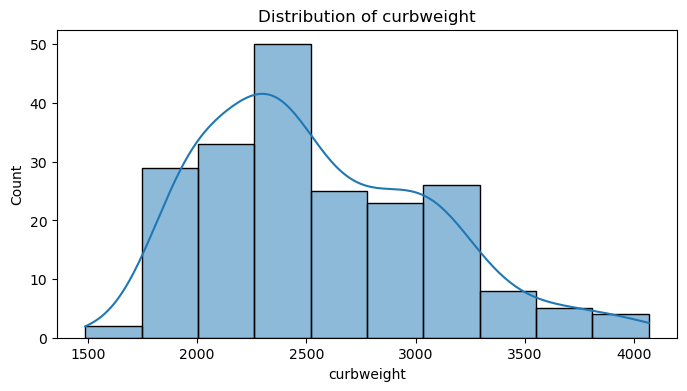

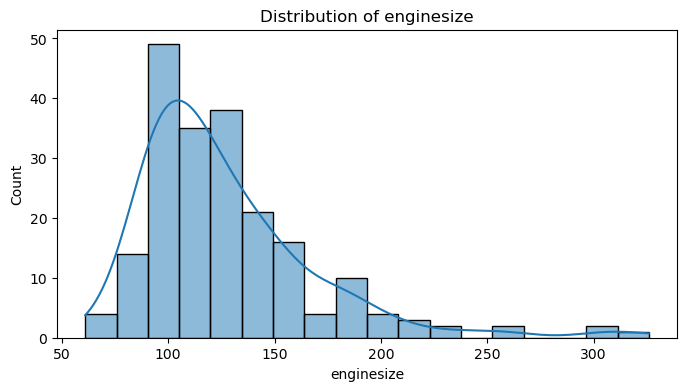

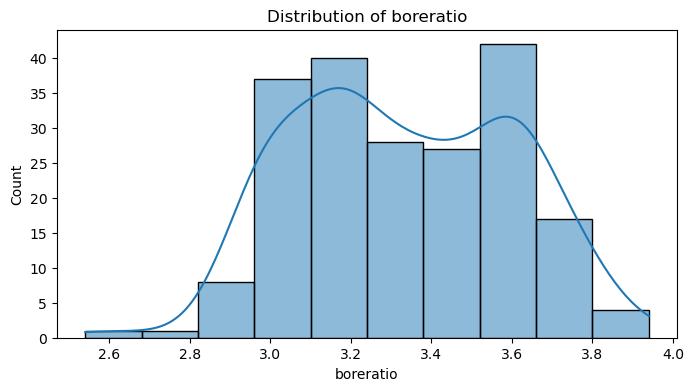

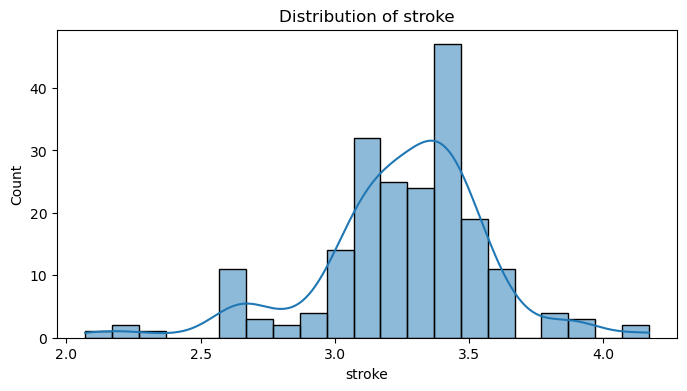

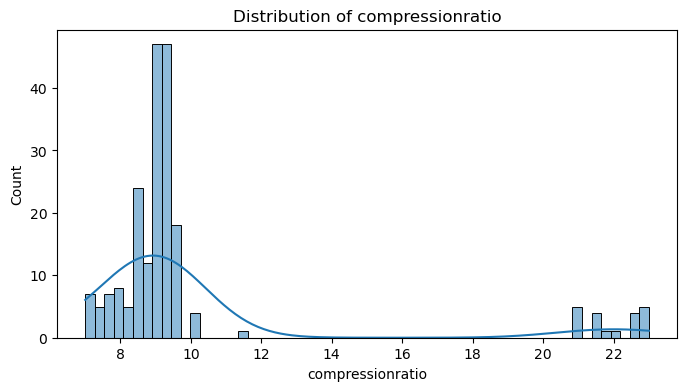

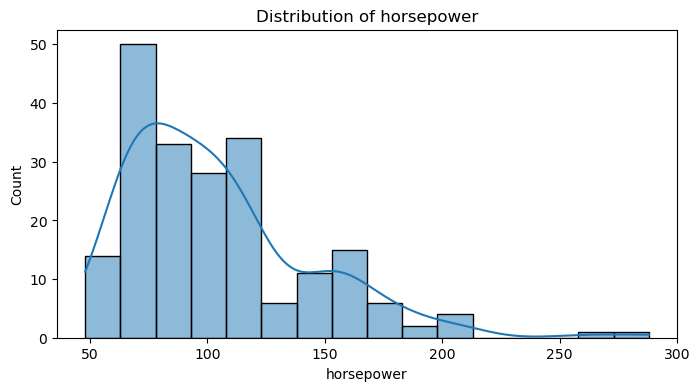

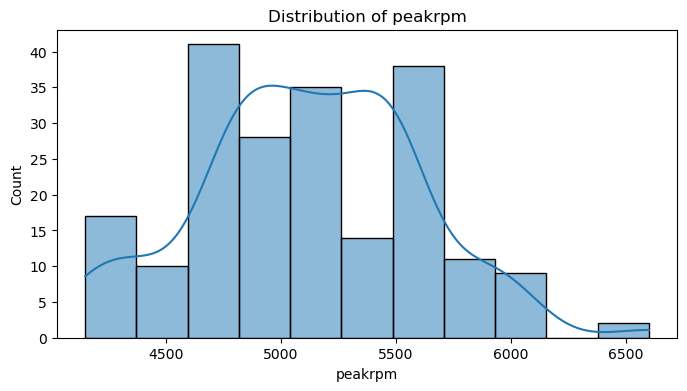

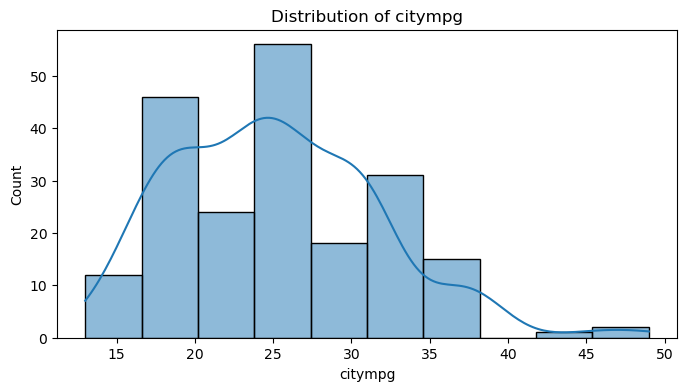

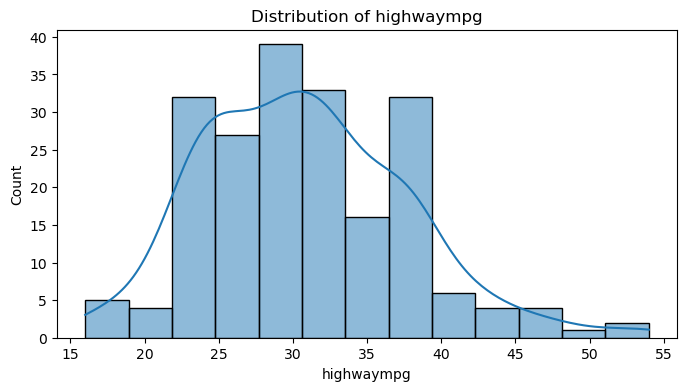

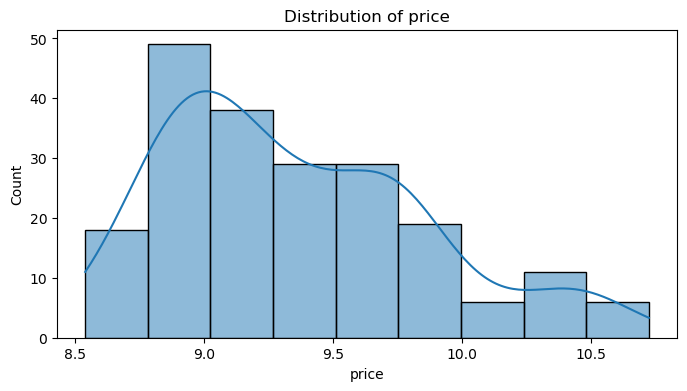

In [21]:
# Univariate analysis of numerical variables
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

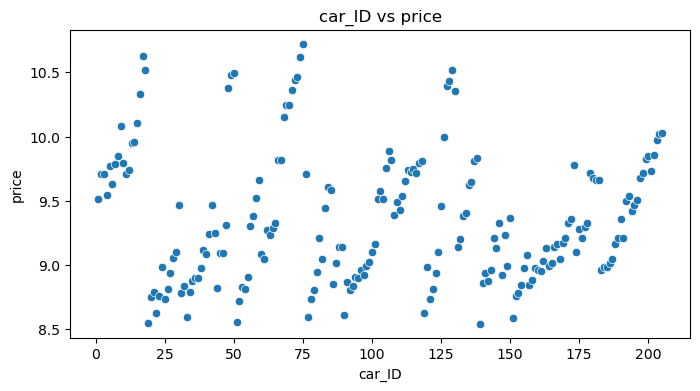

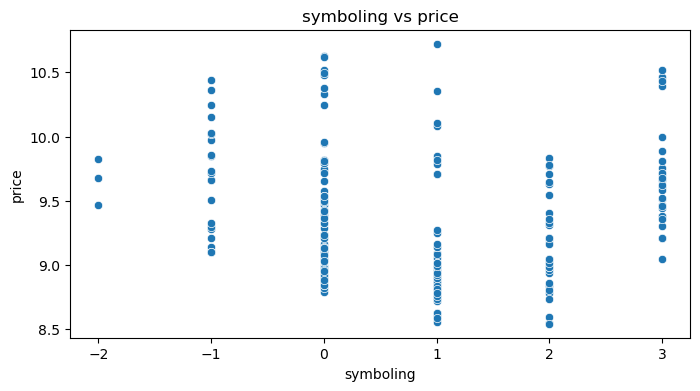

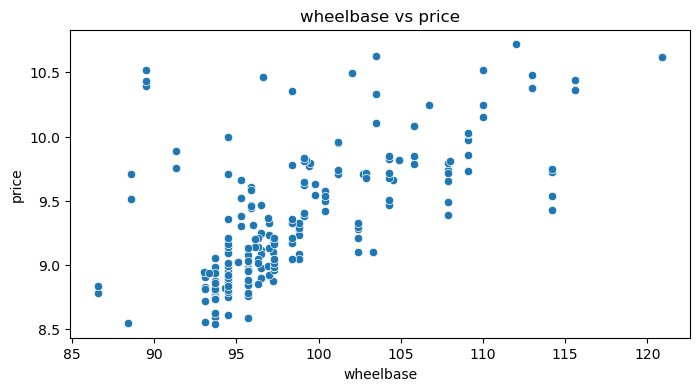

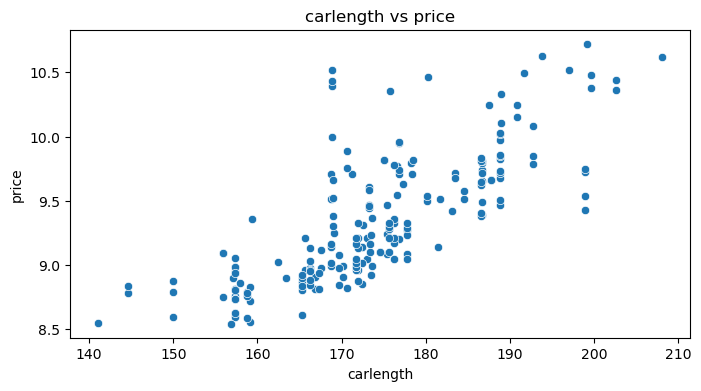

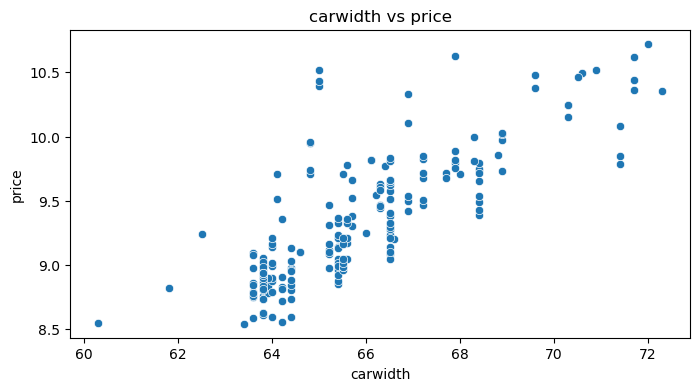

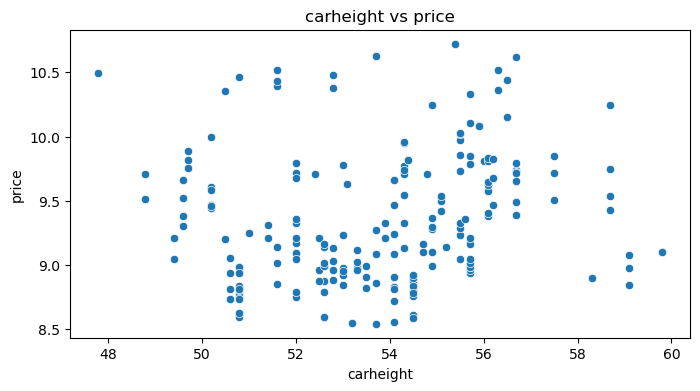

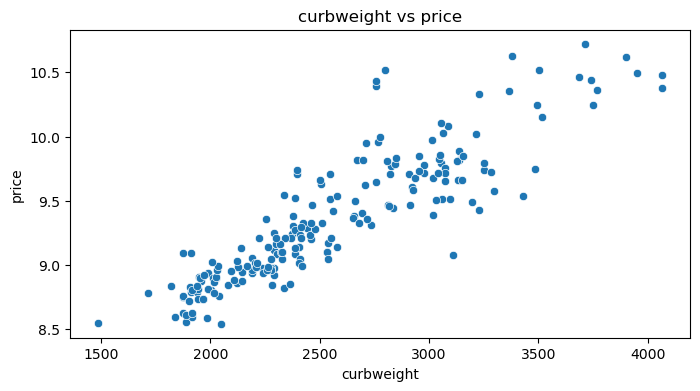

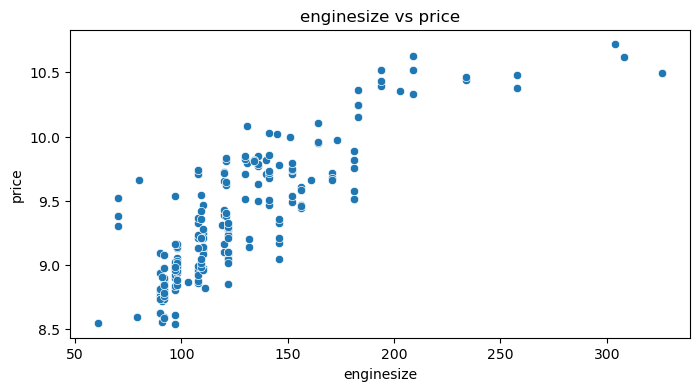

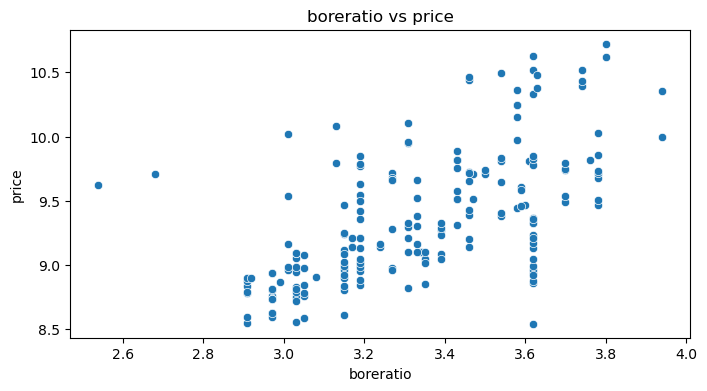

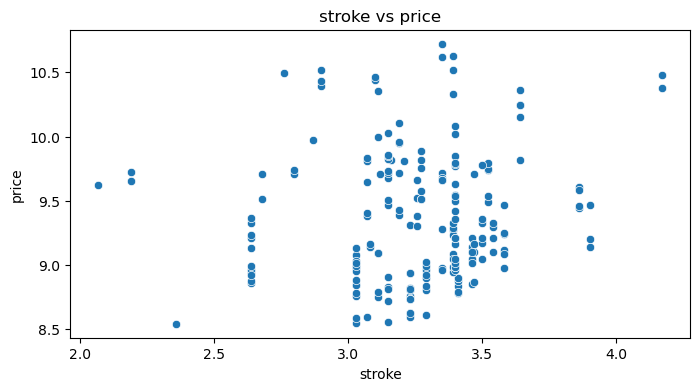

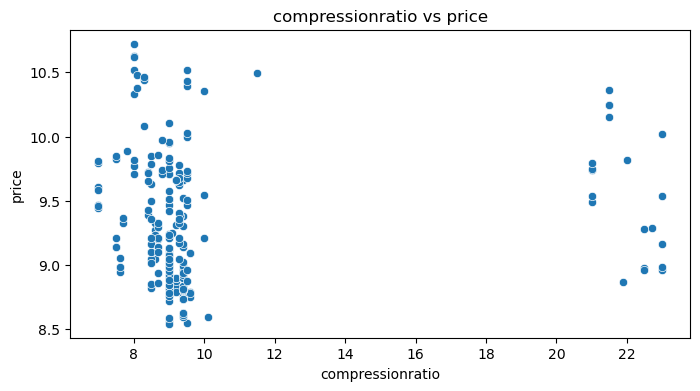

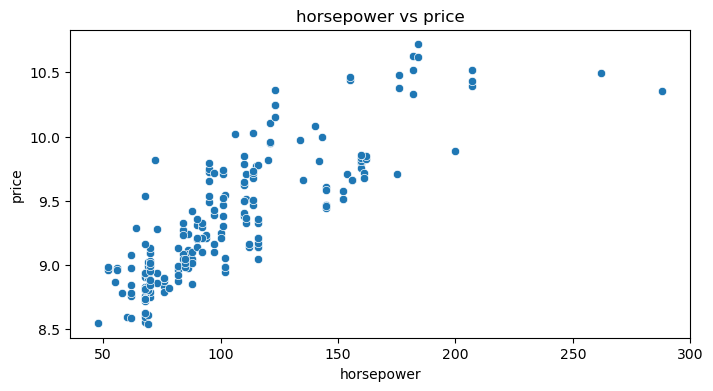

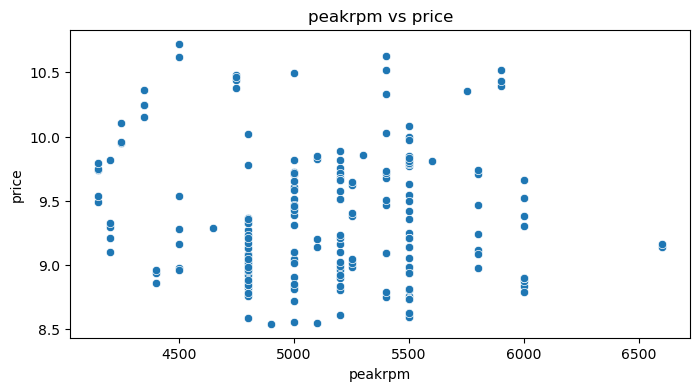

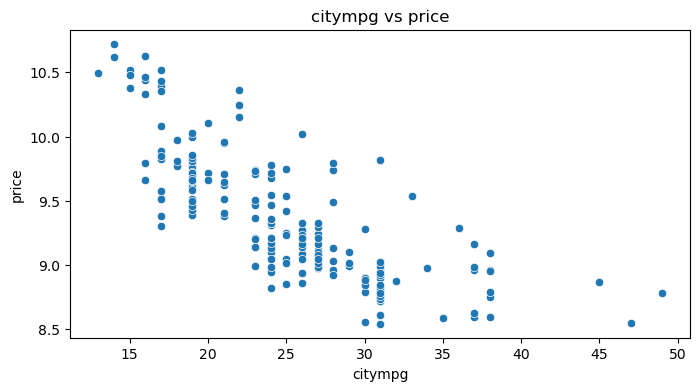

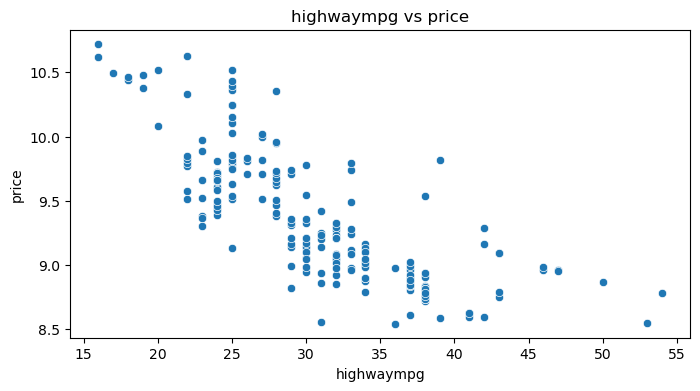

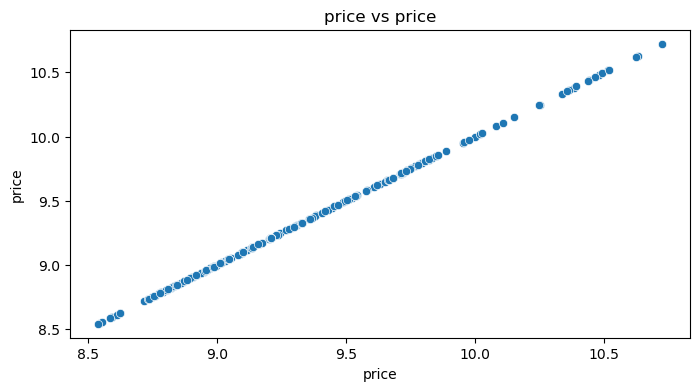

In [22]:
# Bivariate analysis of numerical variables with the target variable 'price'
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=col, y='price', data=df)
    plt.title(f'{col} vs price')
    plt.show()


E:\ANAC\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


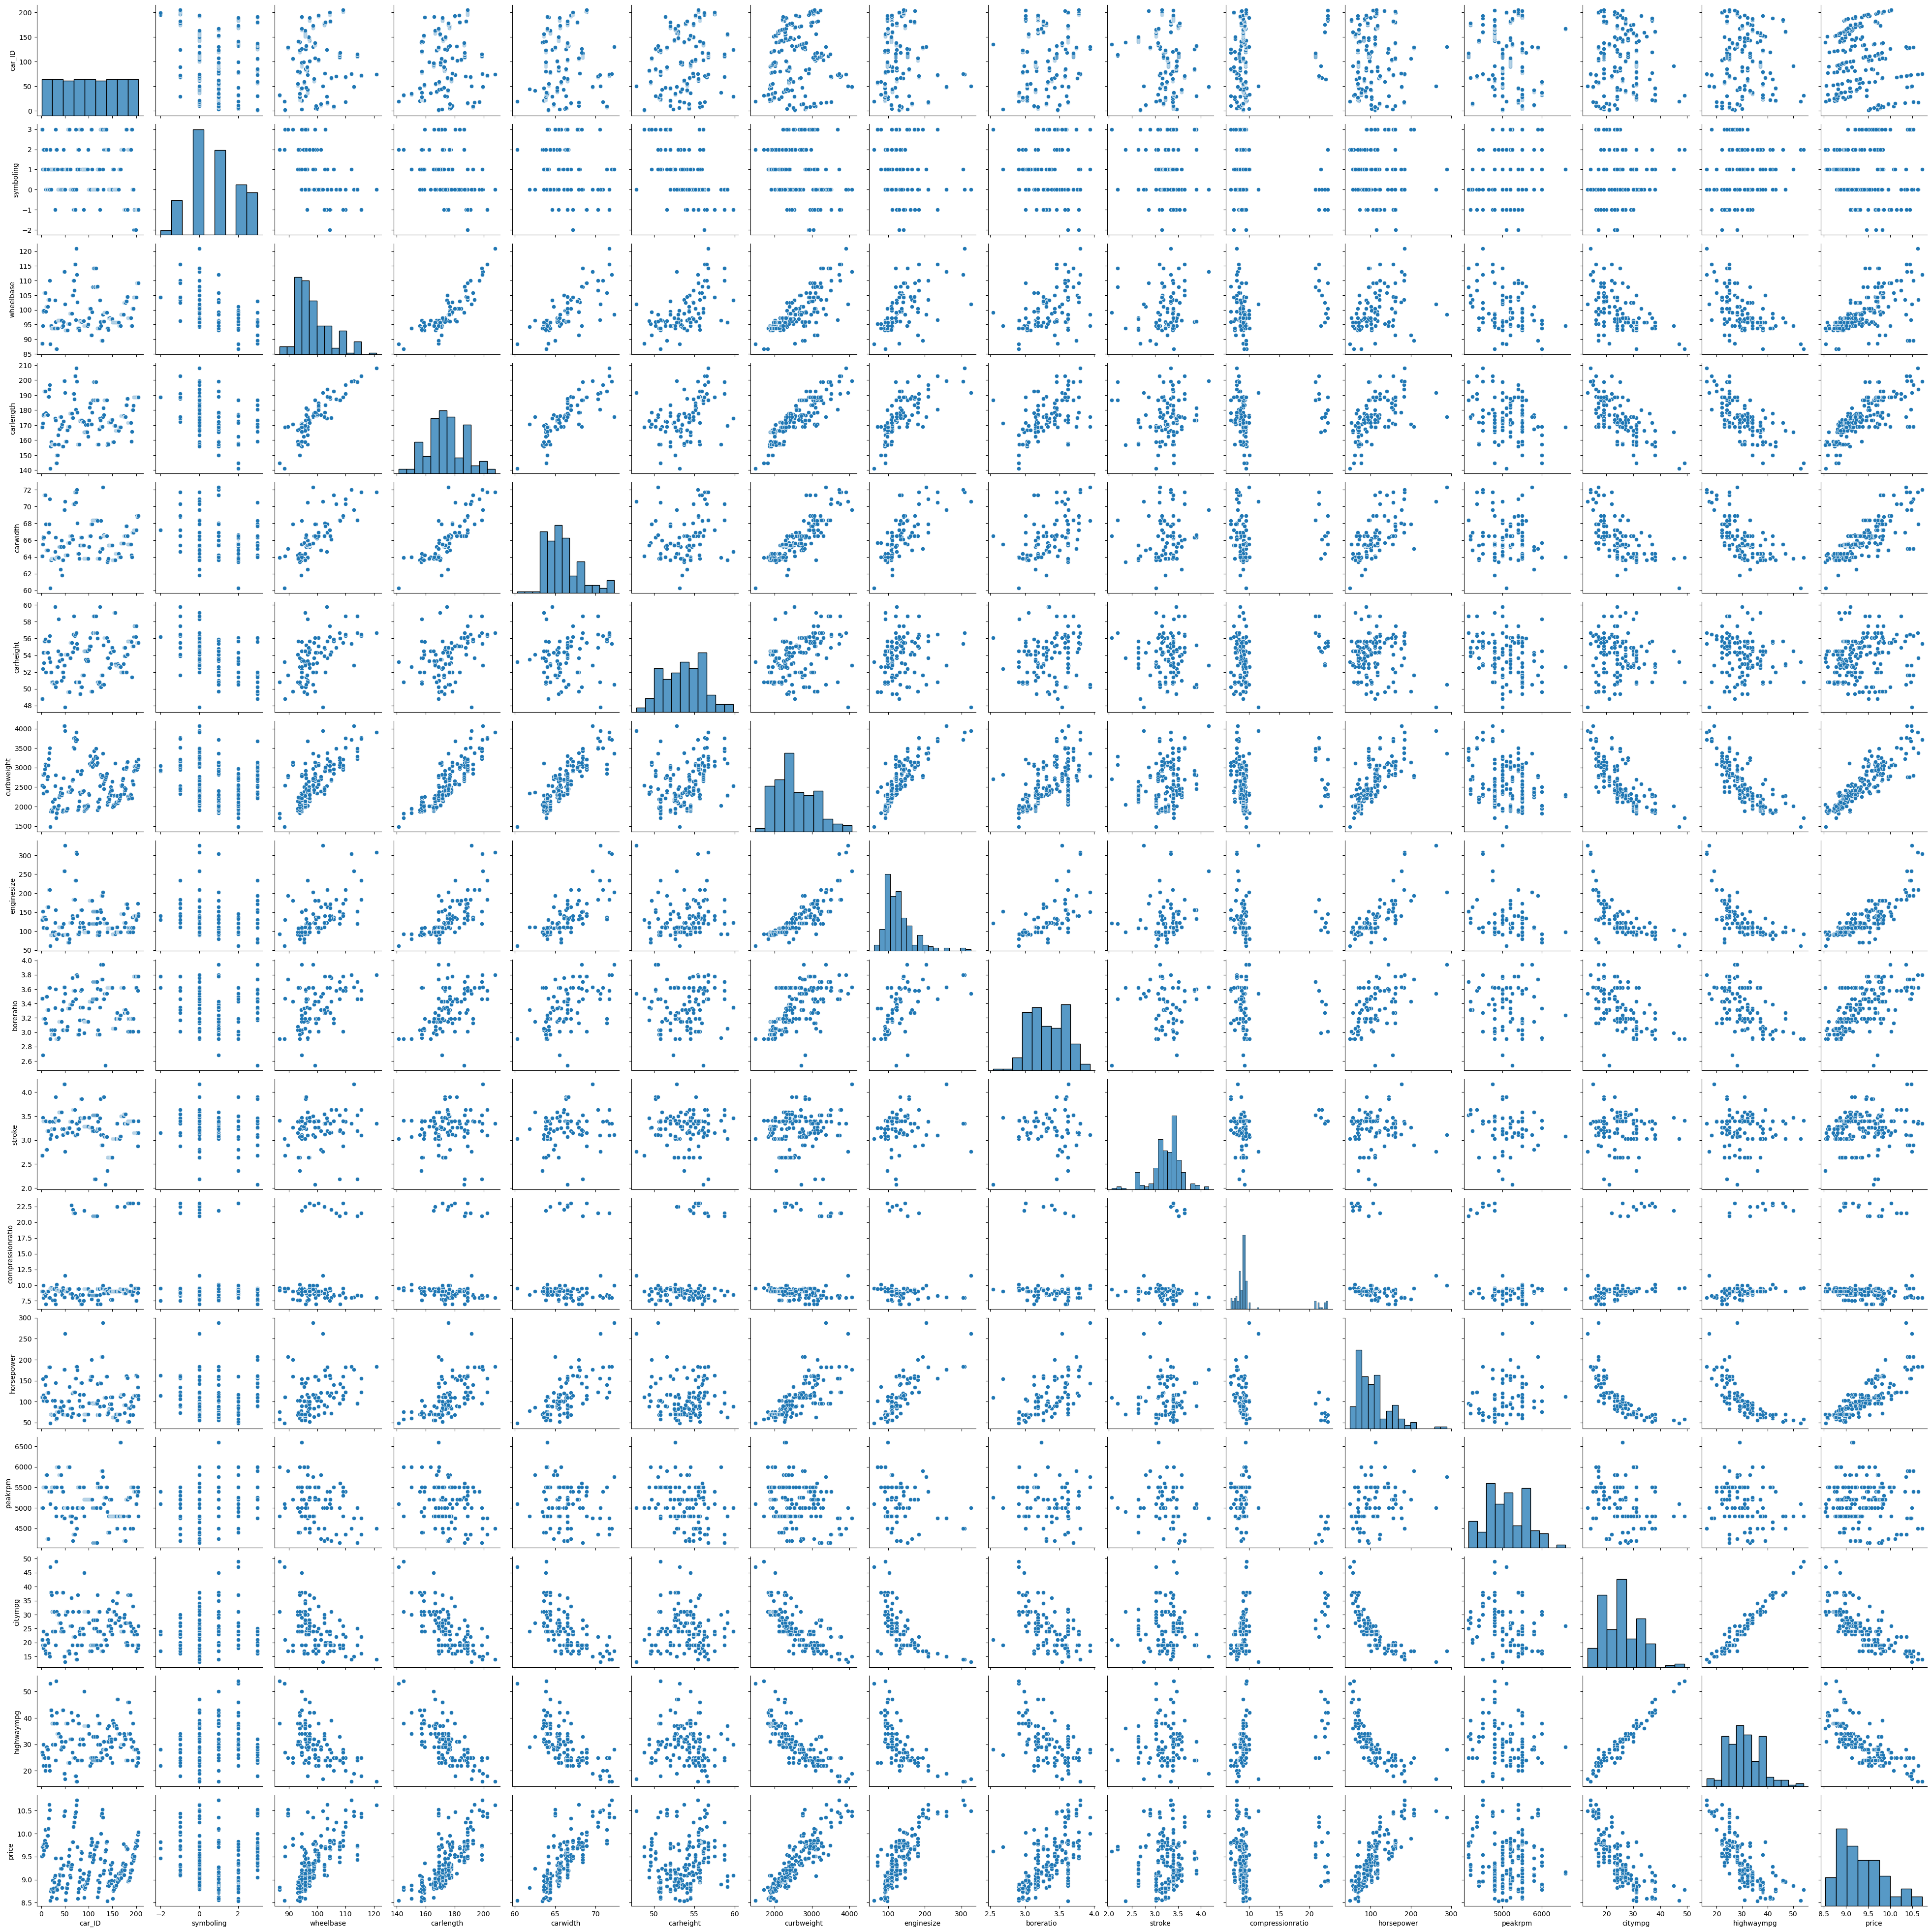

In [23]:
# Multivariate analysis using pairplot
sns.pairplot(df[numerical_cols])
plt.show()

- Perform feature engineering based on sound knowledge of the business problem and available dataset.


In [26]:
# Combining Fueltype and Aspiration
df['Fuel_Aspiration'] = df['fueltype'] + '_' + df['aspiration']



In [27]:
# Creating Total_MPG Column
df['Total_MPG'] = df['citympg'] + df['highwaympg']



In [28]:
# Categorizing Engine Size
df['Engine_Category'] = pd.cut(df['enginesize'], bins=[0, 120, 180, np.inf], labels=['Small', 'Medium', 'Large'])


In [29]:
# Categorizing Horsepower
df['Horsepower_Category'] = pd.cut(df['horsepower'], bins=[0, 100, 200, np.inf], labels=['Low', 'Medium', 'High'])



In [30]:
# Creating Power_Weight_Ratio Column
df['Power_Weight_Ratio'] = df['horsepower'] / df['curbweight']



In [31]:
# Dropping the original columns used for feature engineering
df = df.drop(columns=['fueltype', 'aspiration', 'citympg', 'highwaympg'])

.....

In [32]:
# Encoding Categorical Variables
df = pd.get_dummies(df)


In [34]:
df = df.astype(int)

In [35]:
df.head(5)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,Fuel_Aspiration_diesel_std,Fuel_Aspiration_diesel_turbo,Fuel_Aspiration_gas_std,Fuel_Aspiration_gas_turbo,Engine_Category_Small,Engine_Category_Medium,Engine_Category_Large,Horsepower_Category_Low,Horsepower_Category_Medium,Horsepower_Category_High
0,1,3,88,168,64,48,2548,130,3,2,...,0,0,1,0,0,1,0,0,1,0
1,2,3,88,168,64,48,2548,130,3,2,...,0,0,1,0,0,1,0,0,1,0
2,3,1,94,171,65,52,2823,152,2,3,...,0,0,1,0,0,1,0,0,1,0
3,4,2,99,176,66,54,2337,109,3,3,...,0,0,1,0,1,0,0,0,1,0
4,5,2,99,176,66,54,2824,136,3,3,...,0,0,1,0,0,1,0,0,1,0


Split the dataset into train and test data sets and perform the scaling on both
sets if necessary.

In [36]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)



In [37]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (164, 234)
X_test shape: (41, 234)
y_train shape: (164,)
y_test shape: (41,)


### Build the base model


In [38]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
model_ols = sm.OLS(y_train, X_train_const).fit()
print(model_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     6.560
Date:                Thu, 11 Apr 2024   Prob (F-statistic):             0.0209
Time:                        11:58:23   Log-Likelihood:                 283.35
No. Observations:                 164   AIC:                            -248.7
Df Residuals:                       5   BIC:                             244.2
Df Model:                         158                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

 The overall R2 value is 0.871. This indicates that approximately 87.1% of the variance in the dependent variable (car price) can be explained by the independent variables in the model. Generally, an R2 value closer to 1 is considered better, so an R2 of 0.871 is quite good.

 

The adjusted R2 value is 0.865. The adjusted R2 takes into account the number of predictors in the model and adjusts the R2 value accordingly. It is similar to R2 but penalizes the addition of unnecessary variables that do not improve the model significantly. The adjusted R2 is slightly lower than the R2, which is expected when there are multiple predictors in the model.



 To determine which variables are significant, you can look at the p-values associated with each variable in the model. Variables with p-values less than a chosen significance level (e.g., 0.05) are considered significant. It's important to note that significance should be interpreted in the context of the specific model and dataset.

 

To assess multicollinearity, you can look at the variance inflation factor (VIF) for each predictor variable. VIF values greater than 10 are often considered indicative of multicollinearity. High VIF values suggest that the predictor variables are highly correlated with each other, which can make it difficult to determine the individual effects of each variable on the dependent variable.

 

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train.values,i))
    
pd.DataFrame({'Columns':X_train.columns , 'VIF': vif}).sort_values('VIF')

E:\ANAC\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
E:\ANAC\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Columns,VIF
9,stroke,53.063232
8,boreratio,135.913376
13,Total_MPG,173.390808
4,carwidth,262.985139
1,symboling,351.357049
...,...,...
127,CarName_toyota carina,NaN
129,CarName_toyota celica gt liftback,NaN
142,CarName_toyota tercel,NaN
150,CarName_volkswagen rabbit custom,NaN


Other key model output parameters to consider include:

Coefficients: These indicate the strength and direction of the relationship between each predictor variable and the dependent variable.

Standard errors: These indicate the variability of the coefficient estimates.

Confidence intervals: These provide a range within which the true coefficient value is likely to fall.

Residuals: These are the differences between the observed values and the predicted values. Examining the distribution of residuals can help assess the model's assumptions, such as homoscedasticity and normality of errors.

F-statistic: This statistic tests the overall significance of the model.

Durbin-Watson statistic: This tests for the presence of autocorrelation in the residuals.

AIC and BIC: These are information criteria that can be used for model comparison, with lower values indicating a better-fitting model.

 ##### Understand how the model is performing, Perform feature engineering again if needed. Do feature selection. Try with various models like parametric and nonparametric models. Once you choose the final model, rebuild the model with the best parameters.

###### Note: If you are performing with Linear models, check the model is fulfilling the assumptions.


In [40]:
from sklearn.metrics import mean_squared_error, r2_score
performance_data = []

def model_performance(model, name):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    rmse_train = round(np.sqrt(mean_squared_error(y_train, pred_train)),2)
    rmse_test = round(np.sqrt(mean_squared_error(y_test, pred_test)),2)
    
    r2_train = r2_score(y_train, pred_train)
    r2_test = r2_score(y_test, pred_test)

    performance_data.append({'Name': name,
                             'Train_RMSE': rmse_train,
                             'Test_RMSE': rmse_test,
                             'Train_R2': r2_train,
                             'Test_R2': r2_test})
    
    print('Train RMSE:', rmse_train)
    print('Test RMSE:', rmse_test)
    print('Train R^2:', r2_train)
    print('Test R^2:', r2_test)



In [41]:
# Base  Model
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression().fit(X_train, y_train)
model_performance(model_lr, 'Base Model (Linear Regression)')
performance_df = pd.DataFrame(performance_data)


Train RMSE: 0.04
Test RMSE: 1.36
Train R^2: 0.9951988676417709
Test R^2: -4.556505769572054


In [43]:
# Building Model using Decision Tree

from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor().fit(X_train, y_train)
model_performance(model_dt , 'DecisionTree w/o tuning')


Train RMSE: 0.0
Test RMSE: 0.35
Train R^2: 1.0
Test R^2: 0.631294964028777


In [44]:
# Building Model using Random Forest

from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor().fit(X_train, y_train)

model_performance(model_rf , 'RandomForest w/o tuning')

Train RMSE: 0.1
Test RMSE: 0.32
Train R^2: 0.9728461612747465
Test R^2: 0.692345143884892


In [45]:
# Building model using Adaboost

from sklearn.ensemble import AdaBoostRegressor

model_ab = AdaBoostRegressor().fit(X_train, y_train)

model_performance(model_ab , 'AdaBost w/o tuning')

Train RMSE: 0.22
Test RMSE: 0.34
Train R^2: 0.8756973851171164
Test R^2: 0.6435047666016629


In [46]:
# Buidling model using Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor().fit(X_train, y_train)

model_performance(model_gb , 'GradientBoosting w/o tuning')

Train RMSE: 0.05
Test RMSE: 0.34
Train R^2: 0.9945789172109935
Test R^2: 0.6551455924558615


In [47]:
# Building Model using Xtreme Gradient Boosting 

from xgboost import XGBRegressor

model_xgb = XGBRegressor().fit(X_train, y_train)

model_performance(model_xgb , 'XGBoost w/o tuning')

Train RMSE: 0.0
Test RMSE: 0.34
Train R^2: 0.9999975561770068
Test R^2: 0.6489531620582274


In [48]:
# Building Model using KNN

from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor().fit(X_train, y_train)

model_performance(model_knn , 'KNN w/o tuning')

Train RMSE: 0.26
Test RMSE: 0.32
Train R^2: 0.82071656204732
Test R^2: 0.6961870503597121


In [49]:
performance_df = pd.DataFrame(performance_data)

In [50]:
performance_df

,Name,Train_RMSE,Test_RMSE,Train_R2,Test_R2
0,Base Model (Linear Regression),0.04,1.36,0.995199,-4.556506
1,DecisionTree w/o tuning,0.00,0.35,1.000000,0.631295
2,RandomForest w/o tuning,0.10,0.32,0.972846,0.692345
3,AdaBost w/o tuning,0.22,0.34,0.875697,0.643505
4,GradientBoosting w/o tuning,0.05,0.34,0.994579,0.655146
5,XGBoost w/o tuning,0.00,0.34,0.999998,0.648953
6,KNN w/o tuning,0.26,0.32,0.820717,0.696187


Based on the metrics , the best model for this dataset appears to be the Decision Tree model without tuning. It has the lowest Test_RMSE (0.35) and a relatively high Test_R2 (0.631295), indicating good performance in terms of both accuracy and generalization. 

In [51]:
# GridsearchCV

from sklearn.model_selection import GridSearchCV

# RandomForest hyperparameter tuning

params = {'n_estimators' : [100,150,200] , 
         'max_depth' : [5,6,7,8],
         'max_features' : [None , 'sqrt' , 'log'] ,
         'min_samples_split' : [4,5,6,7,8,9]}

grid_rf = GridSearchCV(estimator = RandomForestRegressor() , param_grid = params , cv = 5).fit(X_train, y_train)

print(grid_rf.best_params_)

model_rf_tuned = grid_rf.best_estimator_.fit(X_train, y_train)

model_performance(model_rf_tuned , 'RandomForest with tuning')

C:\Users\SREYAS\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SREYAS\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SREYAS\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\SREYAS\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
   

{'max_depth': 8, 'max_features': None, 'min_samples_split': 5, 'n_estimators': 100}
Train RMSE: 0.12
Test RMSE: 0.32
Train R^2: 0.9631235808841675
Test R^2: 0.6893686255120905


......

In [52]:
# XGBoost hyperparameter tuning

params = {'learning_rate': [0.1,0.2,0.5,0.8,1.0],
         'n_estimators': [150,175,200]
         }

grid_xgb = GridSearchCV(estimator = XGBRegressor() , param_grid = params , cv = 5).fit(X_train, y_train)

print(grid_xgb.best_params_)

model_xgb_tuned = grid_xgb.best_estimator_.fit(X_train, y_train)

model_performance(model_xgb_tuned , 'XGBoost with tuning')

{'learning_rate': 1.0, 'n_estimators': 150}
Train RMSE: 0.0
Test RMSE: 0.35
Train R^2: 0.9999995371011896
Test R^2: 0.6335529250315988


In [53]:
# KNN hyperparameter tuning

params = {'n_neighbors': [10,30,50,70,90,100]}

grid_knn = GridSearchCV(estimator = KNeighborsRegressor() , param_grid = params , cv = 5).fit(X_train, y_train)

print(grid_knn.best_params_)

model_knn_tuned = grid_knn.best_estimator_.fit(X_train, y_train)

model_performance(model_knn_tuned , 'KNN with tuning')

{'n_neighbors': 10}
Train RMSE: 0.32
Test RMSE: 0.34
Train R^2: 0.7256900048285853
Test R^2: 0.6460431654676257


In [54]:
# Ridge Regression

from sklearn.linear_model import Ridge

params = {'alpha': [0.1,10,100,150]}

grid_ridge = GridSearchCV(estimator = Ridge() , param_grid = params , cv = 5).fit(X_train, y_train)

print(grid_ridge.best_params_)

model_ridge_tuned = grid_ridge.best_estimator_.fit(X_train, y_train)

model_performance(model_ridge_tuned , 'Ridge with tuning')

{'alpha': 10}
Train RMSE: 0.25
Test RMSE: 0.35
Train R^2: 0.8416324165052451
Test R^2: 0.6368690119948377


In [55]:
# Lasso Regression

from sklearn.linear_model import Lasso

params = {'alpha': [0.1,0.01,0.001,1.0,10]}

grid_lasso = GridSearchCV(estimator = Lasso() , param_grid = params , cv = 5).fit(X_train, y_train)

print(grid_lasso.best_params_)

model_lasso_tuned = grid_lasso.best_estimator_.fit(X_train, y_train)

model_performance(model_lasso_tuned , 'Lasso with tuning')

C:\Users\SREYAS\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.610e-02, tolerance: 5.024e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\SREYAS\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.589e-02, tolerance: 5.002e-03
  model = cd_fast.enet_coordinate_descent(


{'alpha': 1.0}
Train RMSE: 0.36
Test RMSE: 0.34
Train R^2: 0.6696792919728666
Test R^2: 0.6487332692258951


In [56]:
performance_df = pd.DataFrame(performance_data)

In [57]:
performance_df 

,Name,Train_RMSE,Test_RMSE,Train_R2,Test_R2
0,Base Model (Linear Regression),0.04,1.36,0.995199,-4.556506
1,DecisionTree w/o tuning,0.00,0.35,1.000000,0.631295
2,RandomForest w/o tuning,0.10,0.32,0.972846,0.692345
3,AdaBost w/o tuning,0.22,0.34,0.875697,0.643505
4,GradientBoosting w/o tuning,0.05,0.34,0.994579,0.655146
5,XGBoost w/o tuning,0.00,0.34,0.999998,0.648953
6,KNN w/o tuning,0.26,0.32,0.820717,0.696187
7,RandomForest with tuning,0.12,0.32,0.963124,0.689369
8,XGBoost with tuning,0.00,0.35,1.000000,0.633553
9,KNN with tuning,0.32,0.34,0.725690,0.646043


Based on the metrics after HyperTuning , the best model for this dataset appears to be the Decision Tree model without tuning. It has the lowest Test_RMSE (0.35) and a relatively high Test_R2 (0.631295), indicating good performance in terms of both accuracy and generalization.


Good Fit: DecisionTree w/o tuning, RandomForest w/o tuning, GradientBoosting w/o tuning, XGBoost w/o tuning, RandomForest with tuning, XGBoost with tuning - These models have low Train_RMSE and Test_RMSE values, indicating good performance and generalization. Their Train_R2 and Test_R2 values are also relatively high, suggesting that they capture the variance in the data well without overfitting.

Overfit: AdaBoost w/o tuning, KNN w/o tuning, KNN with tuning - These models have significantly lower Train_RMSE compared to Test_RMSE, indicating that they may have memorized the training data and struggle to generalize to new data. The Train_R2 values are much higher than the Test_R2 values, further indicating overfitting.

Underfit: Base Model (Linear Regression), Ridge with tuning, Lasso with tuning - These models have relatively high Test_RMSE values compared to other models, indicating that they may not have captured the underlying patterns in the data well. The Train_R2 and Test_R2 values are also lower compared to other models, suggesting that they are not fitting the data well.

Overall, the DecisionTree w/o tuning, RandomForest w/o tuning, and GradientBoosting w/o tuning models seem to be the best choices, as they have good performance metrics and are less likely to overfit or underfit.

###  Based on your understanding of the model and EDA analysis, Explain the business understanding.

In [61]:
feature_importances = model_dt.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df.head(10))

                                  Feature  Importance
6                              curbweight    0.569479
7                              enginesize    0.215863
193                       fuelsystem_mpfi    0.048151
0                                  car_ID    0.032379
204                     CompanyName_isuzu    0.027927
30                         CarName_bmw z4    0.016735
82             CarName_mitsubishi montero    0.015300
62                     CarName_isuzu MU-X    0.014956
56               CarName_honda civic 1300    0.014855
145  CarName_volkswagen 1131 deluxe sedan    0.013198


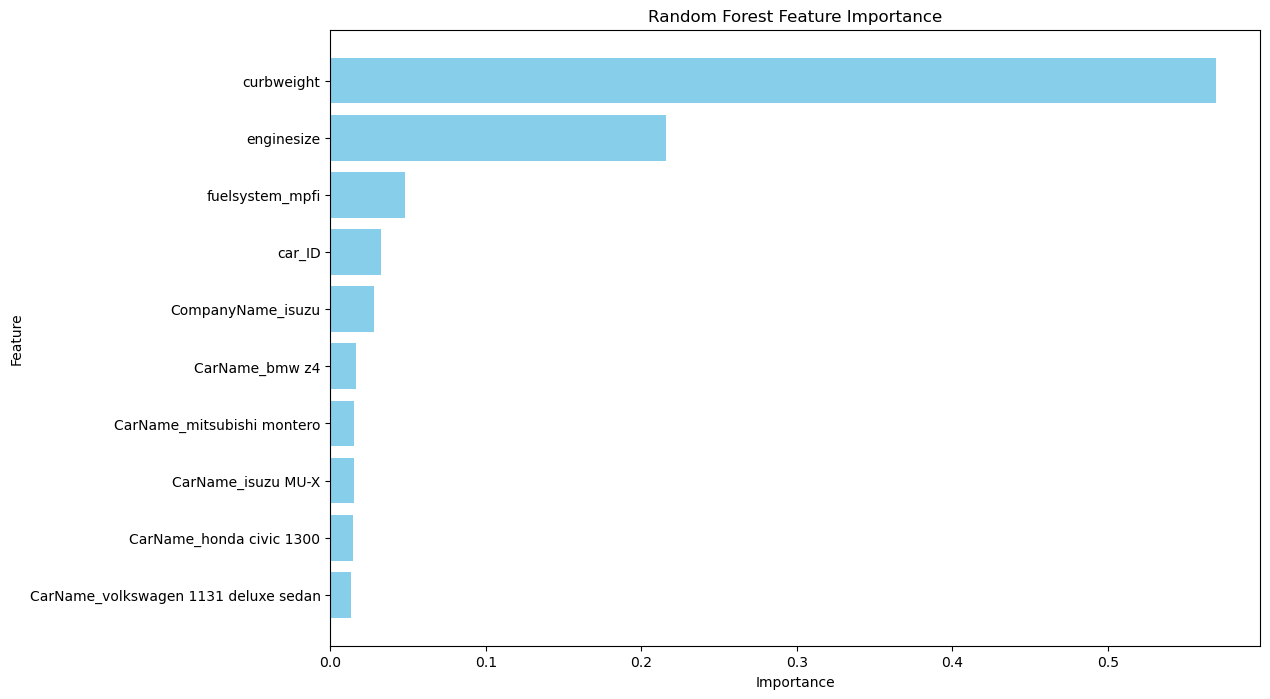

In [60]:
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'].head(10), feature_importance_df['Importance'].head(10), color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  
plt.show()

Based on the feature importance analysis from the Decision Tree model, we can infer the following:

Curb Weight and Engine Size Are Key Factors: The two most important features in predicting car prices are 'curbweight' and 'enginesize'. This suggests that heavier cars with larger engines tend to have higher prices, which aligns with common intuition as these features often indicate higher-end or performance-oriented vehicles.

Fuel System and Car Brand: Features related to the fuel system ('fuelsystem_mpfi') and specific car brands ('CompanyName_isuzu', 'CarName_bmw z4', 'CarName_mitsubishi montero', 'CarName_isuzu MU-X', 'CarName_honda civic 1300', 'CarName_volkswagen 1131 deluxe sedan') also play a significant role in predicting car prices. This indicates that the type of fuel system and the brand of the car can influence its pricing.

Other Features: Features like 'car_ID' also show some importance, but it's less clear how this specific identifier impacts pricing. It could be related to certain unique models or manufacturers.



 The Decision Tree model suggests that factors like curb weight, engine size, fuel system, and car brand are important in determining car prices. This information can be valuable for businesses in the automotive industry, helping them understand the key drivers of pricing and potentially informing pricing strategies or marketing efforts.